# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [1]:
import pandas as pd
import numpy as np
import math
import json
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline


!pip install --upgrade pandas
!pip install --upgrade scikit-learn


# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)
Requirement already up-to-date: scikit-learn in /opt/conda/lib/python3.6/site-packages (0.24.2)


<h2>Dataseta Exploration and Visualization</h2>

<h3>Portfolio</h3>

In [2]:
portfolio.shape

(10, 6)

In [3]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [4]:
portfolio_df = portfolio

Mapping offers' IDs for easier handling of the dataset:

In [5]:
portfolio_df['offer_id'] = 'offer_' + (portfolio_df.index + 1).astype(str)
offer_id_mapping = dict(zip(portfolio_df['id'], portfolio_df['offer_id']))
offer_id_mapping

{'ae264e3637204a6fb9bb56bc8210ddfd': 'offer_1',
 '4d5c57ea9a6940dd891ad53e9dbe8da0': 'offer_2',
 '3f207df678b143eea3cee63160fa8bed': 'offer_3',
 '9b98b8c7a33c4b65b9aebfe6a799e6d9': 'offer_4',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7': 'offer_5',
 '2298d6c36e964ae4a3e7e9706d1fb8c2': 'offer_6',
 'fafdcd668e3743c1bb461111dcafc2a4': 'offer_7',
 '5a8bc65990b245e5a138643cd4eb9837': 'offer_8',
 'f19421c1d4aa40978ebb69ca19b0e20d': 'offer_9',
 '2906b810c7d4411798c6938adc9daaa5': 'offer_10'}

Expansion of channels over multiple rows to enable further analysis:

In [6]:
portfolio_df = portfolio_df.explode('channels').reset_index(drop = True)
portfolio_df

,reward,channels,difficulty,duration,offer_type,id,offer_id
0,10,email,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,offer_1
1,10,mobile,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,offer_1
2,10,social,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,offer_1
3,10,web,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_2
4,10,email,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_2
5,10,mobile,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_2
6,10,social,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_2
7,0,web,0,4,informational,3f207df678b143eea3cee63160fa8bed,offer_3
8,0,email,0,4,informational,3f207df678b143eea3cee63160fa8bed,offer_3
9,0,mobile,0,4,informational,3f207df678b143eea3cee63160fa8bed,offer_3


Unstacking the portfolio datasets:

In [7]:
portfolio_df_wide = portfolio_df.groupby(['offer_id','reward','difficulty','duration','offer_type','channels'])['channels'].count().unstack().notnull().astype(int).reset_index()
portfolio_df_wide = portfolio_df_wide.groupby(['offer_id','reward','difficulty','duration','email','mobile','social','web','offer_type'])['offer_type'].count().unstack().notnull().astype(int).reset_index()
portfolio_df_wide

offer_type,offer_id,reward,difficulty,duration,email,mobile,social,web,bogo,discount,informational
0,offer_1,10,10,7,1,1,1,0,1,0,0
1,offer_10,2,10,7,1,1,0,1,0,1,0
2,offer_2,10,10,5,1,1,1,1,1,0,0
3,offer_3,0,0,4,1,1,0,1,0,0,1
4,offer_4,5,5,7,1,1,0,1,1,0,0
5,offer_5,5,20,10,1,0,0,1,0,1,0
6,offer_6,3,7,7,1,1,1,1,0,1,0
7,offer_7,2,10,10,1,1,1,1,0,1,0
8,offer_8,0,0,3,1,1,1,0,0,0,1
9,offer_9,5,5,5,1,1,1,1,1,0,0


In [8]:
portfolio_df_wide.sum(axis = 0).reset_index()

,offer_type,0
0,offer_id,offer_1offer_10offer_2offer_3offer_4offer_5off...
1,reward,42
2,difficulty,77
3,duration,65
4,email,10
5,mobile,9
6,social,6
7,web,8
8,bogo,4
9,discount,4


<h3>Profile</h3>

In [9]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [10]:
profile_df = profile

Mapping customers' IDs for easier handling of the dataset:

In [11]:
profile_df['cust_id'] = 'c' + (profile_df.index + 1).astype(str)
cust_id_mapping = dict(zip(profile_df['id'], profile_df['cust_id']))
cust_id_mapping

{'68be06ca386d4c31939f3a4f0e3dd783': 'c1',
 '0610b486422d4921ae7d2bf64640c50b': 'c2',
 '38fe809add3b4fcf9315a9694bb96ff5': 'c3',
 '78afa995795e4d85b5d9ceeca43f5fef': 'c4',
 'a03223e636434f42ac4c3df47e8bac43': 'c5',
 'e2127556f4f64592b11af22de27a7932': 'c6',
 '8ec6ce2a7e7949b1bf142def7d0e0586': 'c7',
 '68617ca6246f4fbc85e91a2a49552598': 'c8',
 '389bc3fa690240e798340f5a15918d5c': 'c9',
 '8974fc5686fe429db53ddde067b88302': 'c10',
 'c4863c7985cf408faee930f111475da3': 'c11',
 '148adfcaa27d485b82f323aaaad036bd': 'c12',
 '2eeac8d8feae4a8cad5a6af0499a211d': 'c13',
 'aa4862eba776480b8bb9c68455b8c2e1': 'c14',
 'e12aeaf2d47d42479ea1c4ac3d8286c6': 'c15',
 '31dda685af34476cad5bc968bdb01c53': 'c16',
 '62cf5e10845442329191fc246e7bcea3': 'c17',
 '744d603ef08c4f33af5a61c8c7628d1c': 'c18',
 '6445de3b47274c759400cd68131d91b4': 'c19',
 'a448667f336b42c9a66fc5ffd5d73772': 'c20',
 '440cf1fd7580490c971d8c651ed962af': 'c21',
 '4b0da7e80e5945209a1fdddfe813dbe0': 'c22',
 'c27e0d6ab72c455a8bb66d980963de60': 'c23

Check that all customer IDs are integers and not null, otherwise the mapping would be incomplete:

In [12]:
profile_df['cust_id'].dtype

dtype('O')

In [13]:
profile_df['cust_id'].isnull().astype(int).sort_values(ascending = False)

16999    0
5661     0
5675     0
5674     0
5673     0
        ..
11327    0
11326    0
11325    0
11324    0
0        0
Name: cust_id, Length: 17000, dtype: int64

Compute the membership duration in years:

In [14]:
profile_df['end_date'] = pd.to_datetime(20210430, format =  '%Y%m%d')
profile_df['membership_start'] = pd.to_datetime(profile_df['became_member_on'], format =  '%Y%m%d')
profile_df['membership_years'] = abs(profile_df['end_date'] - profile_df['membership_start']) / pd.Timedelta(365, unit='d')
profile_df

,gender,age,id,became_member_on,income,cust_id,end_date,membership_start,membership_years
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,c1,2021-04-30,2017-02-12,4.213699
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,c2,2021-04-30,2017-07-15,3.794521
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN,c3,2021-04-30,2018-07-12,2.802740
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,c4,2021-04-30,2017-05-09,3.978082
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN,c5,2021-04-30,2017-08-04,3.739726
...,...,...,...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0,c16996,2021-04-30,2018-06-04,2.906849
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0,c16997,2021-04-30,2018-07-13,2.800000
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0,c16998,2021-04-30,2017-01-26,4.260274
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0,c16999,2021-04-30,2016-03-07,5.150685


Exploration of dataset:

In [15]:
profile_df[['age','income','membership_years']].describe()

,age,income,membership_years
count,17000.000000,14825.000000,17000.000000
mean,62.531412,65404.991568,4.182054
std,26.738580,21598.299410,1.126641
min,18.000000,30000.000000,2.764384
25%,45.000000,49000.000000,3.334247
50%,58.000000,64000.000000,3.745205
75%,73.000000,80000.000000,4.931507
max,118.000000,120000.000000,7.758904


Distibution of age:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09a436c1d0>]],
      dtype=object)

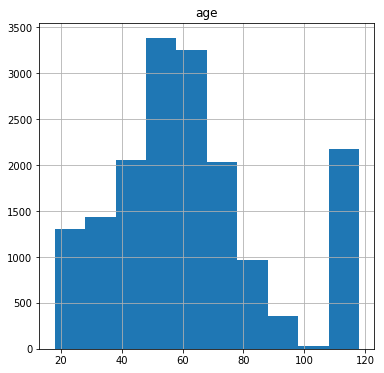

In [16]:
profile_df.hist(column = 'age', figsize = (6,6))

In the distribution of the age of the customers, we notice a strong presence of outliers around age 115 to 120. The proper handling for these records will be analysed later on.

Distribution of income:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09a435e978>]],
      dtype=object)

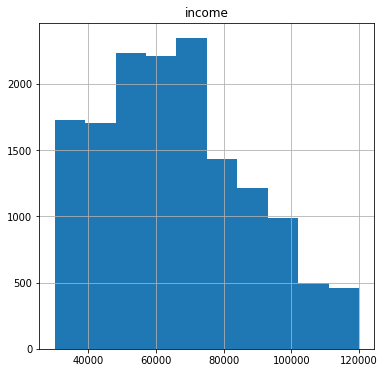

In [17]:
profile_df.hist(column = 'income', figsize = (6,6))

Distribution of memberships' duration:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09a43a3b00>]],
      dtype=object)

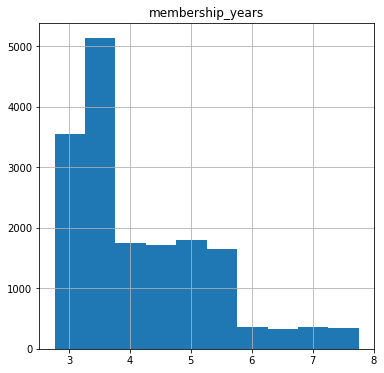

In [18]:
profile_df.hist(column = 'membership_years', figsize = (6,6))

Distribution of gender:

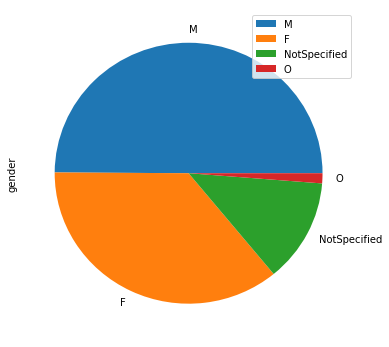

In [19]:
profile_df['gender'].fillna('NotSpecified', inplace = True)
count_gen = pd.DataFrame(profile_df['gender'].value_counts()/profile_df.shape[0])

count_gen.plot.pie(y = 'gender', figsize = (6,6))

In [20]:
count_gen

,gender
M,0.499059
F,0.360529
NotSpecified,0.127941
O,0.012471


The gender NotSpecified is around 12% of the total, a proper handling for this will be decided later on in the analysis. 

<h3>Transcript</h3>

In [21]:
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [22]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [23]:
transcript_df = transcript

The column person seems to contain the same IDs as the profile dataset, therefore the same mapping can be applied:

In [24]:
transcript_df['cust_id'] = transcript_df['person'].map(cust_id_mapping)

Check that all customer IDs are integers and not null, otherwise the mapping would be incomplete:

In [25]:
transcript_df['cust_id'].dtype

dtype('O')

In [26]:
transcript_df['cust_id'].isnull().astype(int).sort_values(ascending = False)

306533    0
102171    0
102173    0
102174    0
102175    0
         ..
204356    0
204357    0
204358    0
204359    0
0         0
Name: cust_id, Length: 306534, dtype: int64

The column value seems to contain multiple information that can unpacked:

In [27]:
transcript_df['value'] = transcript_df['value'].astype(str).str.strip('{}')
transcript_df['value'] = transcript_df['value'].astype(str).str.replace("'", '')

transcript_df['type'] = transcript_df['value'].str.split(':', expand = True)[0]
transcript_df['values'] = transcript_df['value'].str.split(':', expand = True)[1]

transcript_df.head()

,person,event,value,time,cust_id,type,values
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,offer id: 9b98b8c7a33c4b65b9aebfe6a799e6d9,0,c4,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,offer id: 0b1e1539f2cc45b7b9fa7c272da2e1d7,0,c5,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,offer id: 2906b810c7d4411798c6938adc9daaa5,0,c6,offer id,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,offer id: fafdcd668e3743c1bb461111dcafc2a4,0,c7,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,offer id: 4d5c57ea9a6940dd891ad53e9dbe8da0,0,c8,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0


Checking for content and potential naming inconsistencies in the event and type columns:

In [28]:
transcript_df.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [29]:
transcript_df['event'] = transcript_df['event'].astype(str).str.replace(' ', '_')
transcript_df.event.unique()

array(['offer_received', 'offer_viewed', 'transaction', 'offer_completed'],
      dtype=object)

In [30]:
transcript_df.type.unique()

array(['offer id', 'amount', 'offer_id'], dtype=object)

In [31]:
transcript_df.type = transcript_df.type.replace('offer id','offer_id')

transcript_df.type.unique()

array(['offer_id', 'amount'], dtype=object)

Dropping redundant columns:

In [32]:
transcript_df.drop(columns = ['person','value'], inplace = True)

The column value seems to contain the same IDs as the portfolio dataset, therefore the same mapping can be applied:

In [33]:
transcript_df['offer_id'] = transcript_df['values'].astype(str).str.strip(' ').map(offer_id_mapping)
transcript_df

,event,time,cust_id,type,values,offer_id
0,offer_received,0,c4,offer_id,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_4
1,offer_received,0,c5,offer_id,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_5
2,offer_received,0,c6,offer_id,2906b810c7d4411798c6938adc9daaa5,offer_10
3,offer_received,0,c7,offer_id,fafdcd668e3743c1bb461111dcafc2a4,offer_7
4,offer_received,0,c8,offer_id,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_2
...,...,...,...,...,...,...
306529,transaction,714,c16960,amount,1.5899999999999999,NaN
306530,transaction,714,c16965,amount,9.53,NaN
306531,transaction,714,c16980,amount,3.61,NaN
306532,transaction,714,c16988,amount,3.5300000000000002,NaN


Check for mapping issues:

In [34]:
transcript_df[(transcript_df['event'] != 'transaction') & (transcript_df['offer_id'].isna())]

,event,time,cust_id,type,values,offer_id
12658,offer_completed,0,c56,offer_id,"2906b810c7d4411798c6938adc9daaa5, reward",NaN
12672,offer_completed,0,c152,offer_id,"fafdcd668e3743c1bb461111dcafc2a4, reward",NaN
12679,offer_completed,0,c175,offer_id,"9b98b8c7a33c4b65b9aebfe6a799e6d9, reward",NaN
12692,offer_completed,0,c300,offer_id,"ae264e3637204a6fb9bb56bc8210ddfd, reward",NaN
12697,offer_completed,0,c317,offer_id,"4d5c57ea9a6940dd891ad53e9dbe8da0, reward",NaN
...,...,...,...,...,...,...
306475,offer_completed,714,c16339,offer_id,"2298d6c36e964ae4a3e7e9706d1fb8c2, reward",NaN
306497,offer_completed,714,c16665,offer_id,"2298d6c36e964ae4a3e7e9706d1fb8c2, reward",NaN
306506,offer_completed,714,c16765,offer_id,"fafdcd668e3743c1bb461111dcafc2a4, reward",NaN
306509,offer_completed,714,c16768,offer_id,"fafdcd668e3743c1bb461111dcafc2a4, reward",NaN


It seems like the reward keyword is included in the offer_id field, it can be split and shown in a separate column:

In [35]:
transcript_df[['offer_id','reward_obtained']] = transcript_df['values'].str.split(',', expand = True)
transcript_df['offer_id'] = transcript_df['offer_id'].astype(str).str.strip(' ').map(offer_id_mapping)
transcript_df['reward_obtained'] = transcript_df['reward_obtained'].notnull().astype(int)

In [36]:
transcript_df

,event,time,cust_id,type,values,offer_id,reward_obtained
0,offer_received,0,c4,offer_id,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_4,0
1,offer_received,0,c5,offer_id,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_5,0
2,offer_received,0,c6,offer_id,2906b810c7d4411798c6938adc9daaa5,offer_10,0
3,offer_received,0,c7,offer_id,fafdcd668e3743c1bb461111dcafc2a4,offer_7,0
4,offer_received,0,c8,offer_id,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_2,0
...,...,...,...,...,...,...,...
306529,transaction,714,c16960,amount,1.5899999999999999,NaN,0
306530,transaction,714,c16965,amount,9.53,NaN,0
306531,transaction,714,c16980,amount,3.61,NaN,0
306532,transaction,714,c16988,amount,3.5300000000000002,NaN,0


The columns type and values contain both offer IDs and transaction amounts, the first step could be to create two separate datasets to be prepared separately:

In [37]:
offers_df = transcript_df[transcript_df['type'] == 'offer_id'].drop(columns = ['type','values']).reset_index(drop = True)  

In [38]:
amounts_df = transcript_df[transcript_df['type'] == 'amount'].drop(columns = ['type','offer_id','reward_obtained']).reset_index(drop = True)

Preparation of offers_df in order to reduce every combination of customer and offer to one dataframe line with all the events:

In [39]:
offers_df_unstack = offers_df.groupby(['cust_id','offer_id','time','event'])['event'].count().unstack().notnull().astype(int).reset_index()
offers_df_unstack

event,cust_id,offer_id,time,offer_completed,offer_received,offer_viewed
0,c1,offer_10,168,0,1,0
1,c1,offer_10,216,0,0,1
2,c1,offer_5,336,0,1,0
3,c1,offer_5,348,0,0,1
4,c1,offer_6,504,0,1,1
...,...,...,...,...,...,...
150450,c9999,offer_7,168,0,1,0
150451,c9999,offer_7,192,0,0,1
150452,c9999,offer_7,366,1,0,0
150453,c9999,offer_8,408,0,1,0


In [40]:
offer_reward = offers_df.groupby(['cust_id','offer_id','time'])['reward_obtained'].max().reset_index()

In [41]:
offers_df = offers_df_unstack.merge(offer_reward, on = ['cust_id','offer_id','time'])
offers_df

,cust_id,offer_id,time,offer_completed,offer_received,offer_viewed,reward_obtained
0,c1,offer_10,168,0,1,0,0
1,c1,offer_10,216,0,0,1,0
2,c1,offer_5,336,0,1,0,0
3,c1,offer_5,348,0,0,1,0
4,c1,offer_6,504,0,1,1,0
...,...,...,...,...,...,...,...
150450,c9999,offer_7,168,0,1,0,0
150451,c9999,offer_7,192,0,0,1,0
150452,c9999,offer_7,366,1,0,0,1
150453,c9999,offer_8,408,0,1,0,0


In [42]:
offers_df_1 = offers_df.groupby(['cust_id','offer_id'])[['offer_completed', 'offer_received', 'offer_viewed', 'reward_obtained', 'time']].max().reset_index()

In [43]:
offers_df_1

,cust_id,offer_id,offer_completed,offer_received,offer_viewed,reward_obtained,time
0,c1,offer_10,0,1,1,0,216
1,c1,offer_5,0,1,1,0,348
2,c1,offer_6,1,1,1,1,552
3,c1,offer_7,1,1,1,1,582
4,c10,offer_2,0,1,1,0,348
...,...,...,...,...,...,...,...
63283,c9998,offer_8,0,1,1,0,666
63284,c9999,offer_4,1,1,0,1,690
63285,c9999,offer_5,0,1,0,0,0
63286,c9999,offer_7,1,1,1,1,366


Identification of all possibile outcomes of the interactions of customers with an offer:

In [44]:
offers_df_1[['offer_completed', 'offer_received', 'offer_viewed', 'reward_obtained']].drop_duplicates()

,offer_completed,offer_received,offer_viewed,reward_obtained
0,0,1,1,0
2,1,1,1,1
5,1,1,0,1
8,0,1,0,0



The success of an offer will be the sum of the values in the above shown columns and will be interpreted as follows:

- 3 - successful offer: a customer interacted with an offer, completed it and obtained a reward
- 2 - potentially successful offer: a customer completed an offer despite not having viewed it. This means that the offer is interesting for the customers.
- 1 - unsuccessful offer: a customer view an offer but did not complete it
- 0 - no interaction

In [45]:
offers_df_1['offer_success'] = offers_df_1['offer_completed'] + offers_df_1['offer_viewed'] + offers_df_1['reward_obtained'] 
offers_df_1.drop(columns = 'offer_received', inplace = True)

In [46]:
offers_df_1

,cust_id,offer_id,offer_completed,offer_viewed,reward_obtained,time,offer_success
0,c1,offer_10,0,1,0,216,1
1,c1,offer_5,0,1,0,348,1
2,c1,offer_6,1,1,1,552,3
3,c1,offer_7,1,1,1,582,3
4,c10,offer_2,0,1,0,348,1
...,...,...,...,...,...,...,...
63283,c9998,offer_8,0,1,0,666,1
63284,c9999,offer_4,1,0,1,690,2
63285,c9999,offer_5,0,0,0,0,0
63286,c9999,offer_7,1,1,1,366,3


Preparation of amounts_df:

In [47]:
amounts_df = amounts_df.groupby(['cust_id','time'])['values'].sum().reset_index()

Identification of time of completion of an offer in the original transcript df in order to assign a transaction amount to each offer and customer:

In [48]:
completed_df = transcript_df[transcript_df['event'] == 'offer_completed'][['cust_id','offer_id','time']].drop_duplicates().reset_index(drop = True)
completed_df 

,cust_id,offer_id,time
0,c56,offer_10,0
1,c152,offer_7,0
2,c175,offer_4,0
3,c300,offer_1,0
4,c317,offer_2,0
...,...,...,...
33177,c16339,offer_6,714
33178,c16665,offer_6,714
33179,c16765,offer_7,714
33180,c16768,offer_7,714


In [49]:
amounts_df_1 = completed_df.merge(amounts_df, on = ['cust_id','time']).sort_values(by = 'cust_id')
amounts_df_1['offer_completed'] = 1

Merge of the dataframes amounts and offers and drop redundant columns

In [50]:
transcript_new = offers_df_1.merge(amounts_df_1, on = ['offer_id','cust_id','offer_completed','time'], how = 'left')
transcript_new1 = transcript_new.drop(columns = ['offer_completed', 'offer_viewed', 'reward_obtained'])

In [51]:
transcript_new1['values'] = transcript_new['values'].fillna(0).astype(float)
transcript_new1

,cust_id,offer_id,time,offer_success,values
0,c1,offer_10,216,1,0.00
1,c1,offer_5,348,1,0.00
2,c1,offer_6,552,3,2.12
3,c1,offer_7,582,3,0.00
4,c10,offer_2,348,1,0.00
...,...,...,...,...,...
63283,c9998,offer_8,666,1,0.00
63284,c9999,offer_4,690,2,24.85
63285,c9999,offer_5,0,0,0.00
63286,c9999,offer_7,366,3,25.21


<h3>Dataset preparation</h3>

In the preparation of the profile dataset we faced the issue of the age outliers. Since the record containing the age outliers are also not bearing any significant information about income and gender, we might discard them:

In [52]:
profile_df[profile_df['age'] == 118][['income', 'age', 'gender']].drop_duplicates()

,income,age,gender
0,NaN,118,NotSpecified


In [53]:
profile_df1 = profile_df[profile_df['age'] < 118].reset_index(drop = True)
profile_df1

,gender,age,id,became_member_on,income,cust_id,end_date,membership_start,membership_years
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,c2,2021-04-30,2017-07-15,3.794521
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,c4,2021-04-30,2017-05-09,3.978082
2,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,c6,2021-04-30,2018-04-26,3.013699
3,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,c9,2021-04-30,2018-02-09,3.221918
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,c13,2021-04-30,2017-11-11,3.468493
...,...,...,...,...,...,...,...,...,...
14820,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0,c16996,2021-04-30,2018-06-04,2.906849
14821,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0,c16997,2021-04-30,2018-07-13,2.800000
14822,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0,c16998,2021-04-30,2017-01-26,4.260274
14823,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0,c16999,2021-04-30,2016-03-07,5.150685


Creation of customers' profiles based on gender and clusters of income and age and assigning each customer to a profile:

In [54]:
profile_df1['age_bin'] = pd.qcut(profile_df1['age'], q = 5)
profile_df1['income_bin'] = pd.qcut(profile_df1['income'], q = 5)
profile_df1['membership_bin'] = pd.qcut(profile_df1['membership_years'], q = 5)


profile_df1

,gender,age,id,became_member_on,income,cust_id,end_date,membership_start,membership_years,age_bin,income_bin,membership_bin
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,c2,2021-04-30,2017-07-15,3.794521,"(51.0, 59.0]","(85000.0, 120000.0]","(3.578, 4.203]"
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,c4,2021-04-30,2017-05-09,3.978082,"(69.0, 101.0]","(85000.0, 120000.0]","(3.578, 4.203]"
2,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,c6,2021-04-30,2018-04-26,3.013699,"(59.0, 69.0]","(57000.0, 70000.0]","(2.763, 3.247]"
3,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,c9,2021-04-30,2018-02-09,3.221918,"(59.0, 69.0]","(45000.0, 57000.0]","(2.763, 3.247]"
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,c13,2021-04-30,2017-11-11,3.468493,"(51.0, 59.0]","(45000.0, 57000.0]","(3.247, 3.578]"
...,...,...,...,...,...,...,...,...,...,...,...,...
14820,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0,c16996,2021-04-30,2018-06-04,2.906849,"(39.0, 51.0]","(45000.0, 57000.0]","(2.763, 3.247]"
14821,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0,c16997,2021-04-30,2018-07-13,2.800000,"(59.0, 69.0]","(70000.0, 85000.0]","(2.763, 3.247]"
14822,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0,c16998,2021-04-30,2017-01-26,4.260274,"(39.0, 51.0]","(70000.0, 85000.0]","(4.203, 5.189]"
14823,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0,c16999,2021-04-30,2016-03-07,5.150685,"(69.0, 101.0]","(45000.0, 57000.0]","(4.203, 5.189]"


Merging the customer profiles' to the transcript dataset:

In [55]:
transcript_profile_df = transcript_new1.merge(profile_df1, on = ['cust_id'], how = 'inner')
transcript_profile_df

,cust_id,offer_id,time,offer_success,values,gender,age,id,became_member_on,income,end_date,membership_start,membership_years,age_bin,income_bin,membership_bin
0,c100,offer_1,336,0,0.00,F,68,3f4e408b0b2d4ea89dd16d7437d867c1,20160731,84000.0,2021-04-30,2016-07-31,4.750685,"(59.0, 69.0]","(70000.0, 85000.0]","(4.203, 5.189]"
1,c100,offer_10,576,2,16.82,F,68,3f4e408b0b2d4ea89dd16d7437d867c1,20160731,84000.0,2021-04-30,2016-07-31,4.750685,"(59.0, 69.0]","(70000.0, 85000.0]","(4.203, 5.189]"
2,c100,offer_3,408,0,0.00,F,68,3f4e408b0b2d4ea89dd16d7437d867c1,20160731,84000.0,2021-04-30,2016-07-31,4.750685,"(59.0, 69.0]","(70000.0, 85000.0]","(4.203, 5.189]"
3,c100,offer_5,576,0,0.00,F,68,3f4e408b0b2d4ea89dd16d7437d867c1,20160731,84000.0,2021-04-30,2016-07-31,4.750685,"(59.0, 69.0]","(70000.0, 85000.0]","(4.203, 5.189]"
4,c1000,offer_2,30,1,0.00,M,67,633cd1a34e2f4731b2c6aa82c461e731,20171213,44000.0,2021-04-30,2017-12-13,3.380822,"(59.0, 69.0]","(29999.999, 45000.0]","(3.247, 3.578]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55217,c9998,offer_8,666,1,0.00,M,65,953442f68f4b487c80672e1200e31abd,20180721,51000.0,2021-04-30,2018-07-21,2.778082,"(59.0, 69.0]","(45000.0, 57000.0]","(2.763, 3.247]"
55218,c9999,offer_4,690,2,24.85,M,63,0ea0f06e30bf4802afd33b531f871e6e,20160923,90000.0,2021-04-30,2016-09-23,4.602740,"(59.0, 69.0]","(85000.0, 120000.0]","(4.203, 5.189]"
55219,c9999,offer_5,0,0,0.00,M,63,0ea0f06e30bf4802afd33b531f871e6e,20160923,90000.0,2021-04-30,2016-09-23,4.602740,"(59.0, 69.0]","(85000.0, 120000.0]","(4.203, 5.189]"
55220,c9999,offer_7,366,3,25.21,M,63,0ea0f06e30bf4802afd33b531f871e6e,20160923,90000.0,2021-04-30,2016-09-23,4.602740,"(59.0, 69.0]","(85000.0, 120000.0]","(4.203, 5.189]"


<h3> Focus on income distribution </h3>

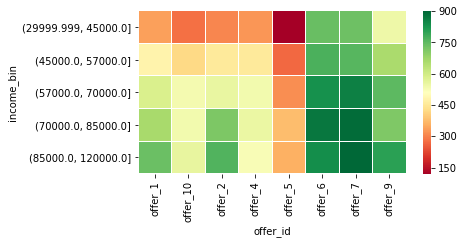

In [56]:
income_matrix_3 = pd.pivot_table(data = transcript_profile_df.loc[transcript_profile_df['offer_success'] == 3], columns = 'offer_id', index = 'income_bin', values = 'offer_success', aggfunc = 'count', fill_value = 0)
fig, ax = plt.subplots(figsize = (6,3))
sns.heatmap(income_matrix_3, cmap ='RdYlGn', linewidths = 0.10)

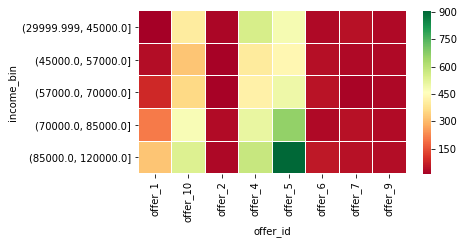

In [57]:
income_matrix_2 = pd.pivot_table(data = transcript_profile_df.loc[transcript_profile_df['offer_success'] == 2], columns = 'offer_id', index = 'income_bin', values = 'offer_success', aggfunc = 'sum', fill_value = 0)
fig, ax = plt.subplots(figsize = (6,3))
sns.heatmap(income_matrix_2, cmap ='RdYlGn', linewidths = 0.10)

In [58]:
income_max_min = income_matrix_3.idxmax(axis=1).reset_index().rename(columns = {0 : 'max_successful'})
income_max_min['min_successful'] = income_matrix_3.idxmin(axis=1).reset_index(drop = True)
income_max_min['max_potential'] = income_matrix_2.idxmax(axis=1).reset_index(drop = True)
income_max_min['min_potential'] = income_matrix_2.idxmin(axis=1).reset_index(drop = True)

income_max_min

,income_bin,max_successful,min_successful,max_potential,min_potential
0,"(29999.999, 45000.0]",offer_6,offer_5,offer_4,offer_1
1,"(45000.0, 57000.0]",offer_6,offer_5,offer_5,offer_2
2,"(57000.0, 70000.0]",offer_7,offer_5,offer_5,offer_2
3,"(70000.0, 85000.0]",offer_7,offer_5,offer_5,offer_6
4,"(85000.0, 120000.0]",offer_7,offer_5,offer_5,offer_2


This overview summarizes the most and least successful offer for each income cluster, both for actually completed offers (viewed and carried out) and for those that were completed without having been viewed (marked in the overview as "potential").

The most successfully completed offers per income group are offer_6 among lower income groups and offer_7 among mid to high income groups. Both offers are of type "discount" and being marketed across all channels. The differences are reward (higher for offer_6) and difficulty (higher for offer_7). The type of offer discount seems the most successful across all income groups:

In [59]:
portfolio_df_wide[portfolio_df_wide['offer_id'].isin(['offer_6', 'offer_7'])]

offer_type,offer_id,reward,difficulty,duration,email,mobile,social,web,bogo,discount,informational
6,offer_6,3,7,7,1,1,1,1,0,1,0
7,offer_7,2,10,10,1,1,1,1,0,1,0


Offer_5 was the least successful among all income groups, probably because of its elevated difficulty:

In [60]:
portfolio_df_wide[portfolio_df_wide['offer_id'].isin(['offer_5'])]

offer_type,offer_id,reward,difficulty,duration,email,mobile,social,web,bogo,discount,informational
5,offer_5,5,20,10,1,0,0,1,0,1,0


Strangely many customer that had not viewed offer_5 completed it, as we can see in the column "max_potential" from the above overview. This offer was the most successful among customers that had not viewed it for mid to high income groups. Low income groups tend to prefer the type "BOGO" (offer_4) while other mid to high income group preferred discount offers:

In [61]:
portfolio_df_wide[portfolio_df_wide['offer_id'].isin(['offer_4', 'offer_5'])]

offer_type,offer_id,reward,difficulty,duration,email,mobile,social,web,bogo,discount,informational
4,offer_4,5,5,7,1,1,0,1,1,0,0
5,offer_5,5,20,10,1,0,0,1,0,1,0


In [62]:
transcript_new[transcript_new['offer_id'] == 'offer_5']

,cust_id,offer_id,offer_completed,offer_viewed,reward_obtained,time,offer_success,values
1,c1,offer_5,0,1,0,348,1,NaN
11,c100,offer_5,0,0,0,576,0,NaN
20,c10001,offer_5,1,1,1,390,3,15.82
32,c10005,offer_5,0,0,0,168,0,NaN
39,c10006,offer_5,0,0,0,576,0,NaN
...,...,...,...,...,...,...,...,...
63258,c9992,offer_5,1,1,1,594,3,21.62
63263,c9993,offer_5,0,0,0,504,0,NaN
63266,c9994,offer_5,0,0,0,504,0,NaN
63269,c9995,offer_5,1,1,1,336,3,NaN


The features of the offers that were completed less often among customers that had not viewed the offer are very diverse:

In [63]:
portfolio_df_wide[portfolio_df_wide['offer_id'].isin(['offer_1', 'offer_2', 'offer_6'])]

offer_type,offer_id,reward,difficulty,duration,email,mobile,social,web,bogo,discount,informational
0,offer_1,10,10,7,1,1,1,0,1,0,0
2,offer_2,10,10,5,1,1,1,1,1,0,0
6,offer_6,3,7,7,1,1,1,1,0,1,0


Offer_2 (BOGO) was pretty unsuccessful as potential offer, being the least preferred in 3 out of 5 income groups that had not viewed the offer.

<h3> Focus on age distribution </h3>

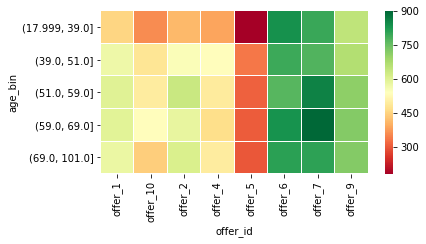

In [64]:
age_matrix_3 = pd.pivot_table(data = transcript_profile_df.loc[transcript_profile_df['offer_success'] == 3], columns = 'offer_id', index = 'age_bin', values = 'offer_success', aggfunc = 'count', fill_value = 0)
fig, ax = plt.subplots(figsize = (6,3))
sns.heatmap(age_matrix_3, cmap ='RdYlGn', linewidths = 0.10)

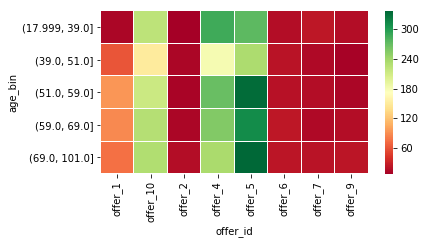

In [65]:
age_matrix_2 = pd.pivot_table(data = transcript_profile_df.loc[transcript_profile_df['offer_success'] == 2], columns = 'offer_id', index = 'age_bin', values = 'offer_success', aggfunc = 'count', fill_value = 0)
fig, ax = plt.subplots(figsize = (6,3))
sns.heatmap(age_matrix_2, cmap ='RdYlGn', linewidths = 0.10)

In [66]:
age_max_min = age_matrix_3.idxmax(axis=1).reset_index().rename(columns = {0 : 'max_successful'})
age_max_min['min_successful'] = age_matrix_3.idxmin(axis=1).reset_index(drop = True)
age_max_min['max_potential'] = age_matrix_2.idxmax(axis=1).reset_index(drop = True)
age_max_min['min_potential'] = age_matrix_2.idxmin(axis=1).reset_index(drop = True)

age_max_min

,age_bin,max_successful,min_successful,max_potential,min_potential
0,"(17.999, 39.0]",offer_6,offer_5,offer_4,offer_2
1,"(39.0, 51.0]",offer_6,offer_5,offer_5,offer_9
2,"(51.0, 59.0]",offer_7,offer_5,offer_5,offer_2
3,"(59.0, 69.0]",offer_7,offer_5,offer_5,offer_2
4,"(69.0, 101.0]",offer_6,offer_5,offer_5,offer_2


<h3> Focus on membership duration distribution </h3>

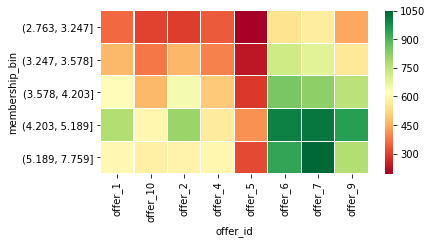

In [67]:
memb_matrix_3 = pd.pivot_table(data = transcript_profile_df.loc[transcript_profile_df['offer_success'] == 3], columns = 'offer_id', index = 'membership_bin', values = 'offer_success', aggfunc = 'count', fill_value = 0)
fig, ax = plt.subplots(figsize = (6,3))
sns.heatmap(memb_matrix_3, cmap ='RdYlGn', linewidths = 0.10)

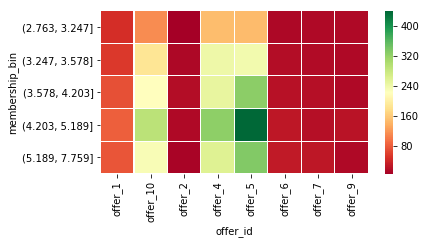

In [68]:
memb_matrix_2 = pd.pivot_table(data = transcript_profile_df.loc[transcript_profile_df['offer_success'] == 2], columns = 'offer_id', index = 'membership_bin', values = 'offer_success', aggfunc = 'count', fill_value = 0)
fig, ax = plt.subplots(figsize = (6,3))
sns.heatmap(memb_matrix_2, cmap ='RdYlGn', linewidths = 0.10)

In [69]:
memb_max_min = memb_matrix_3.idxmax(axis=1).reset_index().rename(columns = {0 : 'max_successful'})
memb_max_min['min_successful'] = memb_matrix_3.idxmin(axis=1).reset_index(drop = True)
memb_max_min['max_potential'] = memb_matrix_2.idxmax(axis=1).reset_index(drop = True)
memb_max_min['min_potential'] = memb_matrix_2.idxmin(axis=1).reset_index(drop = True)

memb_max_min

,membership_bin,max_successful,min_successful,max_potential,min_potential
0,"(2.763, 3.247]",offer_7,offer_5,offer_4,offer_2
1,"(3.247, 3.578]",offer_6,offer_5,offer_4,offer_2
2,"(3.578, 4.203]",offer_6,offer_5,offer_5,offer_9
3,"(4.203, 5.189]",offer_7,offer_5,offer_5,offer_2
4,"(5.189, 7.759]",offer_7,offer_5,offer_5,offer_2


<h3> Focus on gender distribution </h3>

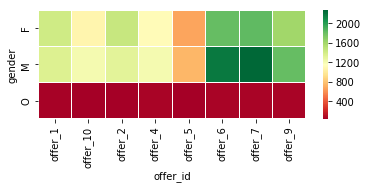

In [70]:
gender_matrix_3 = pd.pivot_table(data = transcript_profile_df.loc[transcript_profile_df['offer_success'] == 3], columns = 'offer_id', index = 'gender', values = 'offer_success', aggfunc = 'count', fill_value = 0)
fig, ax = plt.subplots(figsize = (6, 2))
sns.heatmap(gender_matrix_3, cmap ='RdYlGn', linewidths = 0.10)

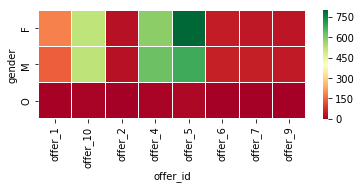

In [71]:
gender_matrix_2 = pd.pivot_table(data = transcript_profile_df.loc[transcript_profile_df['offer_success'] == 2], columns = 'offer_id', index = 'gender', values = 'offer_success', aggfunc = 'count', fill_value = 0)
fig, ax = plt.subplots(figsize = (6, 2))
sns.heatmap(gender_matrix_2, cmap ='RdYlGn', linewidths = 0.10)

In [72]:
gender_max_min = gender_matrix_3.idxmax(axis=1).reset_index().rename(columns = {0 : 'max_successful'})
gender_max_min['min_successful'] = gender_matrix_3.idxmin(axis=1).reset_index(drop = True)
gender_max_min['max_potential'] = gender_matrix_2.idxmax(axis=1).reset_index(drop = True)
gender_max_min['min_potential'] = gender_matrix_2.idxmin(axis=1).reset_index(drop = True)

gender_max_min

,gender,max_successful,min_successful,max_potential,min_potential
0,F,offer_7,offer_5,offer_5,offer_2
1,M,offer_7,offer_5,offer_5,offer_2
2,O,offer_6,offer_5,offer_5,offer_2


No big differences between genders.

<h3>Detailed analysis of offer features</h3>

The visualization of the distributions already provided an insight over the general trend of how customers respond to the different offers. I will now focus on the features of offers:

In [73]:
full_df = transcript_profile_df.merge(portfolio_df_wide, on = ['offer_id'], how = 'inner')
full_df

,cust_id,offer_id,time,offer_success,values,gender,age,id,became_member_on,income,...,reward,difficulty,duration,email,mobile,social,web,bogo,discount,informational
0,c100,offer_1,336,0,0.00,F,68,3f4e408b0b2d4ea89dd16d7437d867c1,20160731,84000.0,...,10,10,7,1,1,1,0,1,0,0
1,c10001,offer_1,522,3,14.62,F,56,46a8553f78b0444c859579017100c0ae,20160809,71000.0,...,10,10,7,1,1,1,0,1,0,0
2,c10005,offer_1,444,1,0.00,M,28,4178b9ae5e874f48b27514bf09f1437c,20171004,64000.0,...,10,10,7,1,1,1,0,1,0,0
3,c10006,offer_1,192,1,0.00,M,37,e7e4b1be1dae4fe78dc9bdeca1d1a904,20160814,66000.0,...,10,10,7,1,1,1,0,1,0,0
4,c1001,offer_1,426,3,15.21,F,52,8d47cbb1da6a4503b2e3b7abdebf6ecb,20180215,71000.0,...,10,10,7,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55217,c9983,offer_6,444,3,0.77,M,68,ff992fbec53145bbae59a68d025e0458,20171102,51000.0,...,3,7,7,1,1,1,1,0,1,0
55218,c9985,offer_6,540,3,15.36,F,42,dcb38adc013b450abc7503a64bfe8a21,20170415,58000.0,...,3,7,7,1,1,1,1,0,1,0
55219,c9989,offer_6,504,0,0.00,M,51,9d972fbd7faf433ebbb70d8ac7200ecb,20140531,33000.0,...,3,7,7,1,1,1,1,0,1,0
55220,c999,offer_6,24,3,14.99,F,55,992aed77ecda4f5180d5da87adaff710,20160611,58000.0,...,3,7,7,1,1,1,1,0,1,0


Preference on the type of offer per income group:

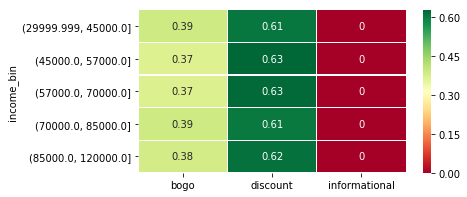

In [74]:
potential_per_income = full_df[full_df['offer_success'] == 2].groupby('income_bin')[['bogo', 'discount', 'informational']].mean().sort_values(by = 'income_bin')
fig, ax = plt.subplots(figsize = (6, 3))
sns.heatmap(potential_per_income, cmap ='RdYlGn', annot=True, linewidths = 0.10)

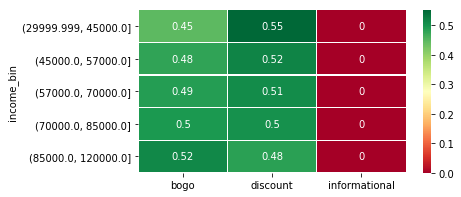

In [75]:
success_per_income = full_df[full_df['offer_success'] == 3].groupby('income_bin')[['bogo', 'discount', 'informational']].mean().sort_values(by = 'income_bin')
fig, ax = plt.subplots(figsize = (6, 3))
sns.heatmap(success_per_income, cmap ='RdYlGn', annot=True, linewidths = 0.10)

Preference on the type of offer per age group:

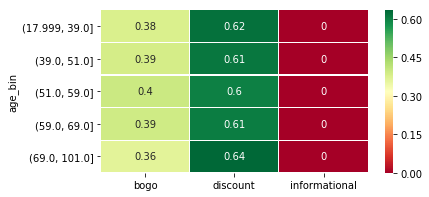

In [76]:
potential_per_age = full_df[full_df['offer_success'] == 2].groupby('age_bin')[['bogo', 'discount', 'informational']].mean().sort_values(by = 'age_bin')
fig, ax = plt.subplots(figsize = (6, 3))
sns.heatmap(potential_per_age, cmap ='RdYlGn', annot=True, linewidths = 0.10)

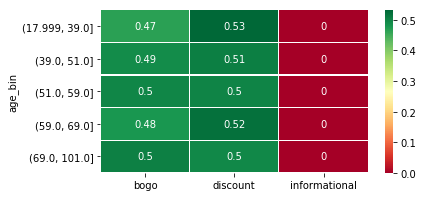

In [77]:
success_per_age = full_df[full_df['offer_success'] == 3].groupby('age_bin')[['bogo', 'discount', 'informational']].mean().sort_values(by = 'age_bin')
fig, ax = plt.subplots(figsize = (6, 3))
sns.heatmap(success_per_age, cmap ='RdYlGn', annot=True, linewidths = 0.10)

Preference on the type of offer per membership duration:

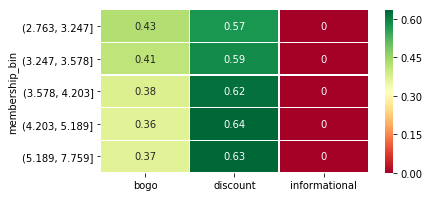

In [78]:
potential_per_memb = full_df[full_df['offer_success'] == 2].groupby('membership_bin')[['bogo', 'discount', 'informational']].mean().sort_values(by = 'membership_bin')
fig, ax = plt.subplots(figsize = (6, 3))
sns.heatmap(potential_per_memb, cmap ='RdYlGn', annot=True, linewidths = 0.10)

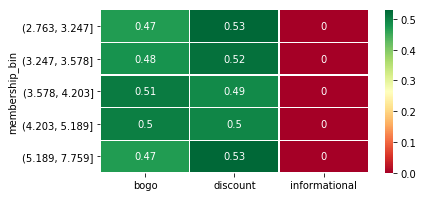

In [79]:
success_per_memb = full_df[full_df['offer_success'] == 3].groupby('membership_bin')[['bogo', 'discount', 'informational']].mean().sort_values(by = 'membership_bin')
fig, ax = plt.subplots(figsize = (6, 3))
sns.heatmap(success_per_memb, cmap ='RdYlGn', annot=True, linewidths = 0.10)

Preference on the type of offer per gender:

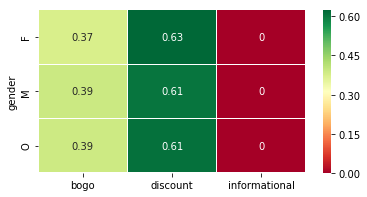

In [80]:
potential_per_gender = full_df[full_df['offer_success'] == 2].groupby('gender')[['bogo', 'discount', 'informational']].mean().sort_values(by = 'gender')
fig, ax = plt.subplots(figsize = (6, 3))
sns.heatmap(potential_per_gender, cmap ='RdYlGn', annot=True, linewidths = 0.10)

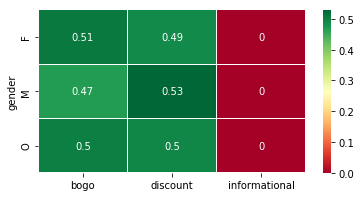

In [81]:
success_per_gender = full_df[full_df['offer_success'] == 3].groupby('gender')[['bogo', 'discount', 'informational']].mean().sort_values(by = 'gender')
fig, ax = plt.subplots(figsize = (6, 3))
sns.heatmap(success_per_gender, cmap ='RdYlGn', annot=True, linewidths = 0.10)

Analysis of reward and difficulty:

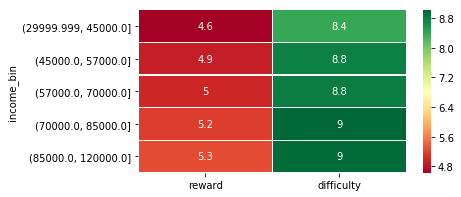

In [82]:
reward_diff_income = full_df[full_df['offer_success'] == 3].groupby('income_bin')[['reward','difficulty']].mean().sort_values(by = 'income_bin')
fig, ax = plt.subplots(figsize = (6, 3))
sns.heatmap(reward_diff_income, cmap ='RdYlGn', annot=True, linewidths = 0.10)

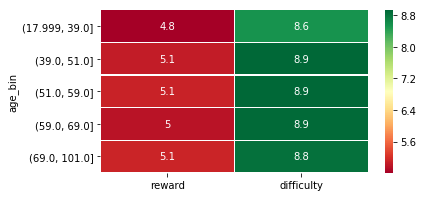

In [83]:
reward_diff_age = full_df[full_df['offer_success'] == 3].groupby('age_bin')[['reward','difficulty']].mean().sort_values(by = 'age_bin')
fig, ax = plt.subplots(figsize = (6, 3))
sns.heatmap(reward_diff_age, cmap ='RdYlGn', annot=True, linewidths = 0.10)

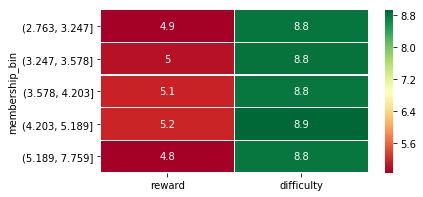

In [84]:
memb_diff_age = full_df[full_df['offer_success'] == 3].groupby('membership_bin')[['reward','difficulty']].mean().sort_values(by = 'membership_bin')
fig, ax = plt.subplots(figsize = (6, 3))
sns.heatmap(memb_diff_age, cmap ='RdYlGn', annot=True, linewidths = 0.10)

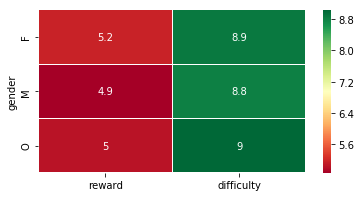

In [85]:
gen_diff_age = full_df[full_df['offer_success'] == 3].groupby('gender')[['reward','difficulty']].mean().sort_values(by = 'gender')
fig, ax = plt.subplots(figsize = (6, 3))
sns.heatmap(gen_diff_age, cmap ='RdYlGn', annot=True, linewidths = 0.10)

Overview most successfull offers:

In [86]:
full_df.groupby(['offer_id', 'offer_success'])['offer_success'].count().unstack().fillna(0).sort_values(by = 3, ascending = False)

offer_success,0,1,2,3
offer_id,,,,
offer_7,73.0,1223.0,94.0,4154.0
offer_6,77.0,1263.0,105.0,4062.0
offer_9,92.0,1791.0,81.0,3481.0
offer_1,235.0,2183.0,333.0,2813.0
offer_2,119.0,2527.0,60.0,2805.0
offer_4,1222.0,693.0,1230.0,2397.0
offer_10,1377.0,720.0,1048.0,2335.0
offer_5,2092.0,552.0,1492.0,1452.0
offer_3,2471.0,3053.0,0.0,0.0


<h2>Data Modelling</h2>

After some emprical observations of the success of the offers among different demographics, a machine learning model will be created to predict whether an offer will be successfull in the different demographic groups.

<h3>Data Preprocessing</h3>

In [87]:
full_df.columns

Index(['cust_id', 'offer_id', 'time', 'offer_success', 'values', 'gender',
       'age', 'id', 'became_member_on', 'income', 'end_date',
       'membership_start', 'membership_years', 'age_bin', 'income_bin',
       'membership_bin', 'reward', 'difficulty', 'duration', 'email', 'mobile',
       'social', 'web', 'bogo', 'discount', 'informational'],
      dtype='object')

Isolation of the relevant variables for modelling (predictors and target variables):

In [88]:
df_model = full_df[['membership_years', 'income', 'age', 'gender', 'offer_success', 'offer_id']]

Only the successful interactions (offer_success >= 2) will be considered and they will be labelled as "1" for simplification purposes. The column 'offer_id' will then been transposed to columns and binarized:

In [89]:
df_model = df_model[df_model['offer_success'] >= 2].reset_index()
df_model['offer_success'].drop_duplicates()

0    3
5    2
Name: offer_success, dtype: int64

In [90]:
df_model['success'] = df_model['offer_success'].map({ 2 : 1, 3 : 1 })

In [91]:
df_model_unstacked = pd.pivot_table(data = df_model, columns = 'offer_id', index = ['membership_years', 'income', 'age', 'gender'], values = 'success', aggfunc = 'max', fill_value = 0).reset_index()

df_model_unstacked

offer_id,membership_years,income,age,gender,offer_1,offer_10,offer_2,offer_4,offer_5,offer_6,offer_7,offer_9
0,2.764384,34000.0,62,M,0,1,0,0,0,0,0,0
1,2.764384,45000.0,26,M,1,0,0,0,0,1,0,0
2,2.764384,45000.0,85,M,0,0,0,0,0,1,0,1
3,2.764384,53000.0,47,M,0,0,0,1,0,0,0,0
4,2.764384,55000.0,78,F,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11973,7.753425,58000.0,67,F,0,0,0,1,0,0,0,0
11974,7.756164,55000.0,58,F,0,1,0,0,0,0,1,0
11975,7.756164,65000.0,52,M,0,0,0,1,0,0,0,1
11976,7.756164,74000.0,36,M,0,0,0,0,0,1,0,0



Check for categorical variables:

In [92]:
df_model_unstacked.dtypes

offer_id
membership_years    float64
income              float64
age                   int64
gender               object
offer_1               int64
offer_10              int64
offer_2               int64
offer_4               int64
offer_5               int64
offer_6               int64
offer_7               int64
offer_9               int64
dtype: object

Mapping of gender (categorical variable):

In [93]:
df_model_unstacked['gender1'] = df_model['gender'].map({ '0': 0, 'M' : 1, 'F' : 2})
df_model_unstacked.drop(columns = ['gender'], inplace = True)

Check for NaN:

In [94]:
np.sum(df_model_unstacked.isnull()) / df_model_unstacked.shape[0] * 100


offer_id
membership_years    0.000000
income              0.000000
age                 0.000000
offer_1             0.000000
offer_10            0.000000
offer_2             0.000000
offer_4             0.000000
offer_5             0.000000
offer_6             0.000000
offer_7             0.000000
offer_9             0.000000
gender1             1.544498
dtype: float64

The gender field will need a special treatment for NaN. Since 1.5% of the occurences are NaN the approach used will be simple imputing according to highest frequency.

Check of data distribution:

In [95]:
df_model_unstacked[['membership_years', 'income', 'age']].describe()

offer_id,membership_years,income,age
count,11978.000000,11978.000000,11978.000000
mean,4.331013,67835.281349,55.235098
std,1.142685,21735.274171,17.043060
min,2.764384,30000.000000,18.000000
25%,3.428082,52000.000000,44.000000
50%,4.049315,67000.000000,56.000000
75%,5.086986,83000.000000,67.000000
max,7.758904,120000.000000,101.000000


Considered the different magnitude of the predictor, __scaling__ is also required for KNN model.

<h3>Model implementation</h3>

The model will need to predict an outcome Yes or No (1 or 0) for the field "success", therefore this can be considered a __binary classification problem__.
The models applied and compared will be Logistic Regression, Linear Support Vector Classification and K-Nearest Neighbors.

Creation of the ML pipeline with __Logistic Regression__:

In [96]:
#Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

pipeline_lr = Pipeline([
        ('imp', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),
        ('scaler', StandardScaler()),
        ('clf', MultiOutputClassifier(LogisticRegression()))
    ])

Isolating the predictors and target variables and splitting the data in test and trainig datasets:

In [97]:
from sklearn.model_selection import train_test_split

X = df_model_unstacked[['membership_years', 'income', 'age', 'gender1']]
y = df_model_unstacked.iloc[:, -9:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Training the pipeline:

In [98]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('imp', SimpleImputer(strategy='most_frequent')),
                ('scaler', StandardScaler()),
                ('clf', MultiOutputClassifier(estimator=LogisticRegression()))])

Predicting value of y:

In [99]:
y_pred_lr = pipeline_lr.predict(X_test)

Creation, training and output prediction of the ML pipeline with __Linear SVC__:

In [100]:
pipeline_svc = Pipeline([
        ('imp', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),
        ('scaler', StandardScaler()),
        ('clf', MultiOutputClassifier(LinearSVC()))
    ])

pipeline_svc.fit(X_train, y_train)

y_pred_svc = pipeline_svc.predict(X_test)

Creation, training and output prediction of the ML pipeline with __K-Nearest Neighbors__:

In [101]:
pipeline_knn = Pipeline([
        ('imp', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),
        ('scaler', StandardScaler()),
        ('clf', MultiOutputClassifier(KNeighborsClassifier()))
    ])

pipeline_knn.fit(X_train, y_train)

y_pred_knn = pipeline_knn.predict(X_test)

<h4>Models Evaluation and Comparison</h4>

For the comparison of results with the different models, a function for the generation of a model's classification report and for the computation of its accuracy is created:

In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def model_evaluation(y_pred, classifier, y_test = y_test):
    '''
    INPUT:
    y_pred - (array) target variable predicted by a classifier
    classifier - (string) name of the classifier used
    y_test - (pandas dataframe) test subset containing the actual values of the target variable 
    
    OUTPUT:
    accuracy score and classification report for single target variables
    
    '''
    
    labels = np.unique(y_pred)
    
    scores = {name: accuracy_score(y_test[name], y_pred[:, i]) for i, name in enumerate(y_test)}
    print(pd.DataFrame.from_dict(scores, orient = 'index'))
    
    print()
  
    for i,name in enumerate(y_test):
        report = classification_report(y_test[name], y_pred[:, i], output_dict=True, zero_division = 0)
        print(name)
        print(pd.DataFrame(report).transpose())

In [103]:
model_evaluation(y_pred_lr, 'lr')

                 0
offer_1   0.742905
offer_10  0.719866
offer_2   0.760267
offer_4   0.691820
offer_5   0.748247
offer_6   0.653088
offer_7   0.653088
offer_9   0.699165

offer_1
              precision    recall  f1-score      support
0              0.742905  1.000000  0.852490  2225.000000
1              0.000000  0.000000  0.000000   770.000000
accuracy       0.742905  0.742905  0.742905     0.742905
macro avg      0.371452  0.500000  0.426245  2995.000000
weighted avg   0.551908  0.742905  0.633319  2995.000000
offer_10
              precision    recall  f1-score      support
0              0.719866  1.000000  0.837119  2156.000000
1              0.000000  0.000000  0.000000   839.000000
accuracy       0.719866  0.719866  0.719866     0.719866
macro avg      0.359933  0.500000  0.418560  2995.000000
weighted avg   0.518208  0.719866  0.602614  2995.000000
offer_2
              precision    recall  f1-score      support
0              0.760267  1.000000  0.863809  2277.000000
1    

In [104]:
model_evaluation(y_pred_svc, 'svc')

                 0
offer_1   0.742905
offer_10  0.719866
offer_2   0.760267
offer_4   0.691820
offer_5   0.748247
offer_6   0.653088
offer_7   0.653088
offer_9   0.699165

offer_1
              precision    recall  f1-score      support
0              0.742905  1.000000  0.852490  2225.000000
1              0.000000  0.000000  0.000000   770.000000
accuracy       0.742905  0.742905  0.742905     0.742905
macro avg      0.371452  0.500000  0.426245  2995.000000
weighted avg   0.551908  0.742905  0.633319  2995.000000
offer_10
              precision    recall  f1-score      support
0              0.719866  1.000000  0.837119  2156.000000
1              0.000000  0.000000  0.000000   839.000000
accuracy       0.719866  0.719866  0.719866     0.719866
macro avg      0.359933  0.500000  0.418560  2995.000000
weighted avg   0.518208  0.719866  0.602614  2995.000000
offer_2
              precision    recall  f1-score      support
0              0.760267  1.000000  0.863809  2277.000000
1    

In [105]:
model_evaluation(y_pred_knn, 'knn')

                 0
offer_1   0.676461
offer_10  0.667780
offer_2   0.722538
offer_4   0.629048
offer_5   0.702504
offer_6   0.591319
offer_7   0.580968
offer_9   0.633055

offer_1
              precision    recall  f1-score      support
0              0.742284  0.864719  0.798837  2225.000000
1              0.253102  0.132468  0.173913   770.000000
accuracy       0.676461  0.676461  0.676461     0.676461
macro avg      0.497693  0.498593  0.486375  2995.000000
weighted avg   0.616518  0.676461  0.638172  2995.000000
offer_10
              precision    recall  f1-score     support
0              0.726139  0.864564  0.789329  2156.00000
1              0.317757  0.162098  0.214680   839.00000
accuracy       0.667780  0.667780  0.667780     0.66778
macro avg      0.521948  0.513331  0.502005  2995.00000
weighted avg   0.611738  0.667780  0.628350  2995.00000
offer_2
              precision    recall  f1-score      support
0              0.769575  0.906456  0.832426  2277.000000
1          

Since the data is indeed unbalanced, in the model refinement the data will be resampled.

<h4>Model Refinement, Evaluation and Validation</h4>

The distribution of the classes seems imbalanced, therefore the class_weight will be set to 'balanced' in the classifiers for LR and SVC to verify whether this changes the accuracy of the model:

In [106]:
pipeline_lr_b = Pipeline([
        ('imp', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),
        ('scaler', StandardScaler()),
        ('clf', MultiOutputClassifier(LogisticRegression(class_weight = 'balanced')))
         ])

pipeline_lr_b.fit(X_train, y_train)

y_pred_lr_b = pipeline_lr_b.predict(X_test)

model_evaluation(y_pred_lr_b, 'LR_balanced')

                 0
offer_1   0.564608
offer_10  0.529883
offer_2   0.565609
offer_4   0.503506
offer_5   0.549583
offer_6   0.509182
offer_7   0.557596
offer_9   0.526878

offer_1
              precision    recall  f1-score      support
0              0.783734  0.571685  0.661123  2225.000000
1              0.305394  0.544156  0.391223   770.000000
accuracy       0.564608  0.564608  0.564608     0.564608
macro avg      0.544564  0.557921  0.526173  2995.000000
weighted avg   0.660755  0.564608  0.591733  2995.000000
offer_10
              precision    recall  f1-score      support
0              0.733458  0.544991  0.625333  2156.000000
1              0.295765  0.491061  0.369176   839.000000
accuracy       0.529883  0.529883  0.529883     0.529883
macro avg      0.514611  0.518026  0.497254  2995.000000
weighted avg   0.610846  0.529883  0.553574  2995.000000
offer_2
              precision    recall  f1-score      support
0              0.796837  0.575318  0.668197  2277.000000
1    

In [107]:
pipeline_svc_b = Pipeline([
        ('imp', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),
        ('scaler', StandardScaler()),
        ('clf', MultiOutputClassifier(LinearSVC(class_weight = 'balanced')))
         ])

pipeline_svc_b.fit(X_train, y_train)

y_pred_svc_b = pipeline_lr_b.predict(X_test)

model_evaluation(y_pred_svc_b, 'SVC_balanced')

                 0
offer_1   0.564608
offer_10  0.529883
offer_2   0.565609
offer_4   0.503506
offer_5   0.549583
offer_6   0.509182
offer_7   0.557596
offer_9   0.526878

offer_1
              precision    recall  f1-score      support
0              0.783734  0.571685  0.661123  2225.000000
1              0.305394  0.544156  0.391223   770.000000
accuracy       0.564608  0.564608  0.564608     0.564608
macro avg      0.544564  0.557921  0.526173  2995.000000
weighted avg   0.660755  0.564608  0.591733  2995.000000
offer_10
              precision    recall  f1-score      support
0              0.733458  0.544991  0.625333  2156.000000
1              0.295765  0.491061  0.369176   839.000000
accuracy       0.529883  0.529883  0.529883     0.529883
macro avg      0.514611  0.518026  0.497254  2995.000000
weighted avg   0.610846  0.529883  0.553574  2995.000000
offer_2
              precision    recall  f1-score      support
0              0.796837  0.575318  0.668197  2277.000000
1    

In [108]:
lr = {name: accuracy_score(y_test[name], y_pred_lr[:, i]) for i, name in enumerate(y_test)}
lr_df = pd.DataFrame.from_dict(lr, orient = 'index')
lr_df['LR_balanced'] = [accuracy_score(y_test[name], y_pred_lr_b[:, i]) for i, name in enumerate(y_test)]
lr_df.rename(columns = {0: 'LR'}, inplace = True)

lr_df

,LR,LR_balanced
offer_1,0.742905,0.564608
offer_10,0.719866,0.529883
offer_2,0.760267,0.565609
offer_4,0.691820,0.503506
offer_5,0.748247,0.549583
offer_6,0.653088,0.509182
offer_7,0.653088,0.557596
offer_9,0.699165,0.526878


In [109]:
svc = {name: accuracy_score(y_test[name], y_pred_svc[:, i]) for i, name in enumerate(y_test)}
svc_df = pd.DataFrame.from_dict(svc, orient = 'index')
svc_df['SVC_balanced'] = [accuracy_score(y_test[name], y_pred_svc_b[:, i]) for i, name in enumerate(y_test)]
svc_df.rename(columns = {0: 'SVC'}, inplace = True)

svc_df

,SVC,SVC_balanced
offer_1,0.742905,0.564608
offer_10,0.719866,0.529883
offer_2,0.760267,0.565609
offer_4,0.691820,0.503506
offer_5,0.748247,0.549583
offer_6,0.653088,0.509182
offer_7,0.653088,0.557596
offer_9,0.699165,0.526878


In [110]:
total = {name: accuracy_score(y_test[name], y_pred_lr[:, i]) for i, name in enumerate(y_test)}
total_df = pd.DataFrame.from_dict(total, orient = 'index')
total_df['SVC'] = [accuracy_score(y_test[name], y_pred_svc[:, i]) for i, name in enumerate(y_test)]
total_df['KNN'] = [accuracy_score(y_test[name], y_pred_knn[:, i]) for i, name in enumerate(y_test)]
total_df.rename(columns = {0: 'LR'}, inplace = True)

total_df

,LR,SVC,KNN
offer_1,0.742905,0.742905,0.676461
offer_10,0.719866,0.719866,0.667780
offer_2,0.760267,0.760267,0.722538
offer_4,0.691820,0.691820,0.629048
offer_5,0.748247,0.748247,0.702504
offer_6,0.653088,0.653088,0.591319
offer_7,0.653088,0.653088,0.580968
offer_9,0.699165,0.699165,0.633055


The balancing did not improve accuracy. Since LR and SVC had a similar accuracy, they will both be considered for parameters tuning with GridSearchCV:

In [111]:
pipeline_lr.get_params()

{'memory': None,
 'steps': [('imp', SimpleImputer(strategy='most_frequent')),
  ('scaler', StandardScaler()),
  ('clf', MultiOutputClassifier(estimator=LogisticRegression()))],
 'verbose': False,
 'imp': SimpleImputer(strategy='most_frequent'),
 'scaler': StandardScaler(),
 'clf': MultiOutputClassifier(estimator=LogisticRegression()),
 'imp__add_indicator': False,
 'imp__copy': True,
 'imp__fill_value': None,
 'imp__missing_values': nan,
 'imp__strategy': 'most_frequent',
 'imp__verbose': 0,
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'clf__estimator__C': 1.0,
 'clf__estimator__class_weight': None,
 'clf__estimator__dual': False,
 'clf__estimator__fit_intercept': True,
 'clf__estimator__intercept_scaling': 1,
 'clf__estimator__l1_ratio': None,
 'clf__estimator__max_iter': 100,
 'clf__estimator__multi_class': 'auto',
 'clf__estimator__n_jobs': None,
 'clf__estimator__penalty': 'l2',
 'clf__estimator__random_state': None,
 'clf__estimator__solver': 'lbf

In [112]:
pipeline_svc.get_params()

{'memory': None,
 'steps': [('imp', SimpleImputer(strategy='most_frequent')),
  ('scaler', StandardScaler()),
  ('clf', MultiOutputClassifier(estimator=LinearSVC()))],
 'verbose': False,
 'imp': SimpleImputer(strategy='most_frequent'),
 'scaler': StandardScaler(),
 'clf': MultiOutputClassifier(estimator=LinearSVC()),
 'imp__add_indicator': False,
 'imp__copy': True,
 'imp__fill_value': None,
 'imp__missing_values': nan,
 'imp__strategy': 'most_frequent',
 'imp__verbose': 0,
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'clf__estimator__C': 1.0,
 'clf__estimator__class_weight': None,
 'clf__estimator__dual': True,
 'clf__estimator__fit_intercept': True,
 'clf__estimator__intercept_scaling': 1,
 'clf__estimator__loss': 'squared_hinge',
 'clf__estimator__max_iter': 1000,
 'clf__estimator__multi_class': 'ovr',
 'clf__estimator__penalty': 'l2',
 'clf__estimator__random_state': None,
 'clf__estimator__tol': 0.0001,
 'clf__estimator__verbose': 0,
 'clf__estima

In [113]:
from sklearn.model_selection import GridSearchCV

parameters = [{'clf__estimator' : [LogisticRegression()],
                'clf__estimator__penalty' : ['l1', 'l2'],
                'clf__estimator__C' : np.logspace(-4, 4, 20),
                'clf__estimator__solver' : ['liblinear']},
                {'clf__estimator' : [LinearSVC()],
                 'clf__estimator__loss' : ['hinge', 'squared_hinge'],
                 'clf__estimator__multi_class' : ['ovr', 'crammer_singer'],
                 'clf__estimator__C' : [0.1, 1, 10, 100]}]
                 

cv = GridSearchCV(pipeline_lr, param_grid=parameters, cv=None, n_jobs=-1, verbose=3)

cv.fit(X_train, y_train)

y_pred_tuned = cv.predict(X_test)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END clf__estimator=LogisticRegression(), clf__estimator__C=0.0001, clf__estimator__penalty=l1, clf__estimator__solver=liblinear;, score=0.000 total time=   0.1s
[CV 2/5] END clf__estimator=LogisticRegression(), clf__estimator__C=0.0001, clf__estimator__penalty=l1, clf__estimator__solver=liblinear;, score=0.000 total time=   0.1s
[CV 3/5] END clf__estimator=LogisticRegression(), clf__estimator__C=0.0001, clf__estimator__penalty=l1, clf__estimator__solver=liblinear;, score=0.000 total time=   0.1s
[CV 4/5] END clf__estimator=LogisticRegression(), clf__estimator__C=0.0001, clf__estimator__penalty=l1, clf__estimator__solver=liblinear;, score=0.000 total time=   0.1s
[CV 5/5] END clf__estimator=LogisticRegression(), clf__estimator__C=0.0001, clf__estimator__penalty=l1, clf__estimator__solver=liblinear;, score=0.000 total time=   0.1s
[CV 1/5] END clf__estimator=LogisticRegression(), clf__estimator__C=0.0001, clf__estimat

/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 1/5] END clf__estimator=LinearSVC(), clf__estimator__C=10, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=ovr;, score=0.000 total time=   3.8s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 2/5] END clf__estimator=LinearSVC(), clf__estimator__C=10, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=ovr;, score=0.000 total time=   3.8s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 3/5] END clf__estimator=LinearSVC(), clf__estimator__C=10, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=ovr;, score=0.000 total time=   3.8s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 4/5] END clf__estimator=LinearSVC(), clf__estimator__C=10, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=ovr;, score=0.000 total time=   3.9s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 5/5] END clf__estimator=LinearSVC(), clf__estimator__C=10, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=ovr;, score=0.000 total time=   4.1s
[CV 1/5] END clf__estimator=LinearSVC(), clf__estimator__C=10, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=crammer_singer;, score=0.000 total time=   2.7s
[CV 2/5] END clf__estimator=LinearSVC(), clf__estimator__C=10, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=crammer_singer;, score=0.000 total time=   2.6s
[CV 3/5] END clf__estimator=LinearSVC(), clf__estimator__C=10, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=crammer_singer;, score=0.000 total time=   2.8s
[CV 4/5] END clf__estimator=LinearSVC(), clf__estimator__C=10, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=crammer_singer;, score=0.000 total time=   2.8s
[CV 5/5] END clf__estimator=LinearSVC(), clf__estimator__C=10, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=crammer_s

/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 1/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=hinge, clf__estimator__multi_class=ovr;, score=0.000 total time=   2.8s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 2/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=hinge, clf__estimator__multi_class=ovr;, score=0.000 total time=   2.7s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 3/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=hinge, clf__estimator__multi_class=ovr;, score=0.000 total time=   2.8s
[CV 4/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=hinge, clf__estimator__multi_class=ovr;, score=0.000 total time=   2.8s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 5/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=hinge, clf__estimator__multi_class=ovr;, score=0.000 total time=   2.9s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 1/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=hinge, clf__estimator__multi_class=crammer_singer;, score=0.000 total time=  26.5s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 2/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=hinge, clf__estimator__multi_class=crammer_singer;, score=0.000 total time=  26.5s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 3/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=hinge, clf__estimator__multi_class=crammer_singer;, score=0.000 total time=  26.1s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 4/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=hinge, clf__estimator__multi_class=crammer_singer;, score=0.000 total time=  26.1s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 5/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=hinge, clf__estimator__multi_class=crammer_singer;, score=0.000 total time=  24.5s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 1/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=ovr;, score=0.013 total time=   4.0s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 2/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=ovr;, score=0.008 total time=   3.9s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 3/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=ovr;, score=0.008 total time=   4.0s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 4/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=ovr;, score=0.018 total time=   3.8s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 5/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=ovr;, score=0.009 total time=   3.8s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 1/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=crammer_singer;, score=0.000 total time=  26.6s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 2/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=crammer_singer;, score=0.000 total time=  25.2s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 3/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=crammer_singer;, score=0.000 total time=  26.7s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 4/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=crammer_singer;, score=0.000 total time=  27.5s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV 5/5] END clf__estimator=LinearSVC(), clf__estimator__C=100, clf__estimator__loss=squared_hinge, clf__estimator__multi_class=crammer_singer;, score=0.000 total time=  26.8s


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [114]:
total_tuned = {name: accuracy_score(y_test[name], y_pred_lr[:, i]) for i, name in enumerate(y_test)}
total_df_tuned = pd.DataFrame.from_dict(total_tuned, orient = 'index')
total_df_tuned['SVC'] = [accuracy_score(y_test[name], y_pred_svc[:, i]) for i, name in enumerate(y_test)]
total_df_tuned['Tuned'] = [accuracy_score(y_test[name], y_pred_tuned[:, i]) for i, name in enumerate(y_test)]
total_df_tuned.rename(columns = {0: 'LR'}, inplace = True)

total_df_tuned

,LR,SVC,Tuned
offer_1,0.742905,0.742905,0.705509
offer_10,0.719866,0.719866,0.620033
offer_2,0.760267,0.760267,0.753923
offer_4,0.691820,0.691820,0.545242
offer_5,0.748247,0.748247,0.743239
offer_6,0.653088,0.653088,0.585977
offer_7,0.653088,0.653088,0.585643
offer_9,0.699165,0.699165,0.676461


Print the best parameters:

In [115]:
cv.best_params_

{'clf__estimator': LinearSVC(C=100),
 'clf__estimator__C': 100,
 'clf__estimator__loss': 'squared_hinge',
 'clf__estimator__multi_class': 'ovr'}

Since no improvement in terms of accuracy could be made, the KNN model will also be tuned:

In [116]:
parameters_knn = { 'clf__estimator__p': [1, 5, 10],
               'clf__estimator__n_neighbors': [2, 3, 4, 5],
               'clf__estimator__weights': ['uniform', 'distance'],
               'clf__estimator__metric': ['euclidean','manhattan']
             }


cv_knn = GridSearchCV(pipeline_knn, param_grid=parameters_knn, cv=None, n_jobs=-1, verbose=3)

cv_knn.fit(X_train, y_train)

y_pred_tuned_knn = cv_knn.predict(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END clf__estimator__metric=euclidean, clf__estimator__n_neighbors=2, clf__estimator__p=1, clf__estimator__weights=uniform;, score=0.017 total time=   0.8s
[CV 2/5] END clf__estimator__metric=euclidean, clf__estimator__n_neighbors=2, clf__estimator__p=1, clf__estimator__weights=uniform;, score=0.019 total time=   0.8s
[CV 3/5] END clf__estimator__metric=euclidean, clf__estimator__n_neighbors=2, clf__estimator__p=1, clf__estimator__weights=uniform;, score=0.013 total time=   0.8s
[CV 4/5] END clf__estimator__metric=euclidean, clf__estimator__n_neighbors=2, clf__estimator__p=1, clf__estimator__weights=uniform;, score=0.025 total time=   0.8s
[CV 5/5] END clf__estimator__metric=euclidean, clf__estimator__n_neighbors=2, clf__estimator__p=1, clf__estimator__weights=uniform;, score=0.013 total time=   0.8s
[CV 1/5] END clf__estimator__metric=euclidean, clf__estimator__n_neighbors=2, clf__estimator__p=1, clf__estimator__wei

In [117]:
total_tuned1 = {name: accuracy_score(y_test[name], y_pred_lr[:, i]) for i, name in enumerate(y_test)}
total_df_tuned1 = pd.DataFrame.from_dict(total_tuned, orient = 'index')
total_df_tuned1['SVC'] = [accuracy_score(y_test[name], y_pred_svc[:, i]) for i, name in enumerate(y_test)]
total_df_tuned1['KNN'] = [accuracy_score(y_test[name], y_pred_knn[:, i]) for i, name in enumerate(y_test)]
total_df_tuned1['Tuned'] = [accuracy_score(y_test[name], y_pred_tuned[:, i]) for i, name in enumerate(y_test)]
total_df_tuned1['KNN_Tuned'] = [accuracy_score(y_test[name], y_pred_tuned_knn[:, i]) for i, name in enumerate(y_test)]
total_df_tuned1.rename(columns = {0: 'LR'}, inplace = True)

total_df_tuned1

,LR,SVC,KNN,Tuned,KNN_Tuned
offer_1,0.742905,0.742905,0.676461,0.705509,0.672120
offer_10,0.719866,0.719866,0.667780,0.620033,0.652421
offer_2,0.760267,0.760267,0.722538,0.753923,0.709850
offer_4,0.691820,0.691820,0.629048,0.545242,0.612688
offer_5,0.748247,0.748247,0.702504,0.743239,0.689816
offer_6,0.653088,0.653088,0.591319,0.585977,0.582972
offer_7,0.653088,0.653088,0.580968,0.585643,0.567613
offer_9,0.699165,0.699165,0.633055,0.676461,0.621703
